# Assignment 5 - 70 points possible

## Apple, Bird, Cookie:
## Data from Google's Quick, Draw!  Game

We will perform 2 tasks in this homework.  The first is to build a classifier that can tell whether a drawing is of an apple, a bird, or a cookie.  The data is taken from a game you can play online, developed by Google, called Quick, Draw!  The drawings are all Pictionary-style quick sketches of things.  Google has already done the work of turning the drawings into grayscale 28 x 28 images that are good for machine learning.  Since the images don't have that many pixels, the drawings are simplified, and there is a lot of data, this is an example of a relatively easy task for machine learning generally and neural networks in particular.  (There are many similar datasets here:  https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false)

Before you do anything else in this assignment, it's *strongly recommended* that you do two things with your Google Colab setup.  First, go to the upper right and select "Connect to a hosted runtime."  Second, go to the menu at the top and select Runtime->Change runtime type->Pick GPU.  Selecting "GPU" will dramatically speed up the training times for the neural networks in this assignment.  But, picking GPU also resets the runtime, which is why you should do this before anything else.

Download the two zip files associated with this homework at https://drive.google.com/file/d/14ZkNqKC34mUW5yUa6WjYWf1R-CempaoB/view?usp=sharing and https://drive.google.com/file/d/14UmGyFC_WSywNcm2yrCfe0x04IuA42O8/view?usp=sharing and place them in your own Google Drive.  Then run the code boxes below (possibly modifying the path) to mount the drive and unzip the files.

In [2]:
# You may need to change "NNAssign" to your own directory name 
!unzip /Users/yunzheyu/Desktop/DS340/hw3/apple_bird_cookie.zip

Archive:  /Users/yunzheyu/Desktop/DS340/hw3/apple_bird_cookie.zip
  inflating: full_numpy_bitmap_apple.npy  
  inflating: __MACOSX/._full_numpy_bitmap_apple.npy  
  inflating: full_numpy_bitmap_bird.npy  
  inflating: __MACOSX/._full_numpy_bitmap_bird.npy  
  inflating: full_numpy_bitmap_cookie.npy  
  inflating: __MACOSX/._full_numpy_bitmap_cookie.npy  


In [1]:
import numpy as np

apples = np.load('full_numpy_bitmap_apple.npy')
birds = np.load('full_numpy_bitmap_bird.npy')
cookies = np.load('full_numpy_bitmap_cookie.npy')

(1, 2pts) Call np.concatenate to join the three datasets together into a single array called "all_kinds".  Notice that the three datasets should be passed to np.concatenate as a tuple.


In [2]:
# TODO concatenate the data
# Assuming apples, birds, and cookies are already loaded as numpy arrays
all_kinds = np.concatenate((apples, birds, cookies), axis=0)

(2, 3 pts) Now we need a list of labels that is as long as all_kinds.  Create a list named "labels" that is as long as all_kinds, where each element identifies which kind of drawing can be found at that place in all_kinds.  Label apples as 0, birds as 1, and cookies as 2.  (You may find it useful to call len() on the apples, birds, and cookies arrays.)

In [3]:
# TODO make labels
# Calculate the length of each original array
num_apples = len(apples)
num_birds = len(birds)
num_cookies = len(cookies)

# Generate labels for each category
labels_apples = [0] * num_apples  # Create a list of 0s for apples
labels_birds = [1] * num_birds    # Create a list of 1s for birds
labels_cookies = [2] * num_cookies  # Create a list of 2s for cookies

# Concatenate the label lists together to form the final labels list
labels = labels_apples + labels_birds + labels_cookies

Now we'll call train_test_split to separate the data into training and testing data.

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_kinds, labels)

(3, 2pts) This data ranges from 0 to 255, but neural networks tend to work best when the data is between 0 and 1.
Scale the train and test data by dividing it by 255.

In [5]:
# TODO scale the data
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

(4, 5pts) If we examine the shape of x, it isn't quite what we want yet - it is an array of arrays that are of size length-of-data x 784.  784 is 28x28, and we want our convolutional neural networks to perceive the data as a 28x28 square instead of one long array of 784 elements.  Call x_train.reshape() and x_test.reshape() so that their dimensions are length-of-data x 28 x 28.  (Note that reshape expects a tuple that is the size as its argument.  You can pass -1 as one of the dimensions if you don't want to figure out how long the array is.)

In [6]:
x_train[0].shape

(784,)

In [7]:
# TODO reshape x_train
x_train_reshaped = x_train.reshape((-1, 28, 28))

In [8]:
# TODO reshape x_test
x_test_reshaped = x_test.reshape((-1, 28, 28))

If your reshape worked correctly, the following code should show a apple, bird, or cookie sketch.  If it didn't work, it will look like random noise.  If you're not sure, you can always try more images.

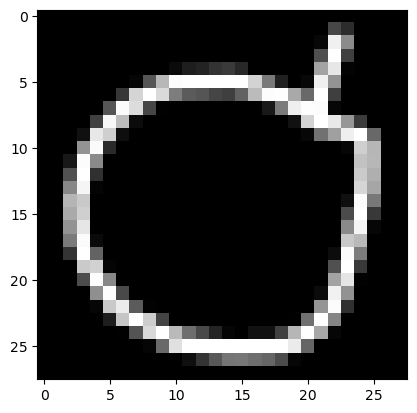

In [10]:
import matplotlib.pyplot as plt

# Ensure you're using the reshaped version of x_train
plt.imshow(x_train_reshaped[0], cmap='gray')  # Adding cmap='gray' for grayscale images
plt.show()


As the last step before creating the neural network, we will turn the labels into one-hot encodings, like [0,0,1] instead of 2.  There's a handy keras function that does this, and we're just going to call it for you.

In [11]:
from tensorflow import keras
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(5, 9pts) Rather than create a network completely from scratch, it makes sense to start with a network that you know does something similar.  One of the keras tutorials shows how to do digit recognition with a relatively small deep neural network.  The dataset, the MNIST digit dataset, is very similar to ours because it consists of 28 x 28 black and white line drawings.  Consult the "Build a Model" and "Train the model" sections of https://keras.io/examples/vision/mnist_convnet/ and get that neural network running on our apple, bird, and cookie data.  (Be sure to leave a comment indicating that you borrowed the structure from there.)


In [12]:
# TODO borrow the MNIST model with attribution
from tensorflow import keras
from tensorflow.keras import layers

# Adapted from https://keras.io/examples/vision/mnist_convnet/

num_classes = 3

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),  # Ensure the input shape is correct for our 28x28 images
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),  # Adjusted to num_classes for our classification task
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Note: Before training, ensure x_train_reshaped and y_train are correctly prepared
# Also, ensure x_train_reshaped is reshaped to (-1, 28, 28, 1) to match the input shape expectation
x_train_reshaped = x_train_reshaped.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_reshaped.reshape(-1, 28, 28, 1)

model.fit(x_train_reshaped, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
model.evaluate(x_test_reshaped, y_test, verbose=1)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/10


2024-02-22 21:05:37.577735: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2161/2161 [==============================] - 37s 17ms/step - loss: 0.2659 - accuracy: 0.9400 - val_loss: 0.0959 - val_accuracy: 0.9710
Epoch 2/10
2161/2161 [==============================] - 35s 16ms/step - loss: 0.1121 - accuracy: 0.9646 - val_loss: 0.0749 - val_accuracy: 0.9762
Epoch 3/10
2161/2161 [==============================] - 36s 16ms/step - loss: 0.0956 - accuracy: 0.9695 - val_loss: 0.0694 - val_accuracy: 0.9783
Epoch 4/10
2161/2161 [==============================] - 617s 286ms/step - loss: 0.0896 - accuracy: 0.9719 - val_loss: 0.0667 - val_accuracy: 0.9787
Epoch 5/10
2161/2161 [==============================] - 35s 16ms/step - loss: 0.0855 - accuracy: 0.9729 - val_loss: 0.0642 - val_accuracy: 0.9798
Epoch 6/10
2161/2161 [==============================] - 34s 16ms/step - loss: 0.0815 - accuracy: 0.9739 - val_loss: 0.0630 - val_accuracy: 0.9798
Epoch 7/10
2161/2161 [==============================] - 35s 16ms/step - loss: 0.0807 - accuracy: 0.9744 - val_loss: 0.0699 - val_accu

[0.061212413012981415, 0.980734646320343]

In [13]:
# TODO compile and fit the model
from tensorflow.keras.optimizers import Adam

# Assuming the model is already defined as per the previous instructions

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Assuming x_train_reshaped and x_test_reshaped have been correctly reshaped to (-1, 28, 28, 1)
# and y_train and y_test have been converted to one-hot encodings

# Fit the model on the training data
history = model.fit(x_train_reshaped, y_train, batch_size=128, epochs=10, validation_split=0.1)

# After training, you can evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Epoch 1/10
2161/2161 [==============================] - 36s 17ms/step - loss: 0.0764 - accuracy: 0.9754 - val_loss: 0.0613 - val_accuracy: 0.9803
Epoch 2/10
2161/2161 [==============================] - 36s 17ms/step - loss: 0.0757 - accuracy: 0.9757 - val_loss: 0.0765 - val_accuracy: 0.9765
Epoch 3/10
2161/2161 [==============================] - 36s 17ms/step - loss: 0.0744 - accuracy: 0.9760 - val_loss: 0.0594 - val_accuracy: 0.9810
Epoch 4/10
2161/2161 [==============================] - 36s 16ms/step - loss: 0.0747 - accuracy: 0.9761 - val_loss: 0.0596 - val_accuracy: 0.9810
Epoch 5/10
2161/2161 [==============================] - 35s 16ms/step - loss: 0.0739 - accuracy: 0.9763 - val_loss: 0.0607 - val_accuracy: 0.9809
Epoch 6/10
2161/2161 [==============================] - 35s 16ms/step - loss: 0.0734 - accuracy: 0.9763 - val_loss: 0.0624 - val_accuracy: 0.9809
Epoch 7/10
2161/2161 [==============================] - 35s 16ms/step - loss: 0.0733 - accuracy: 0.9765 - val_loss: 0.0639 -

(6, 2pts) Evaluate the model on the test set with the code below.  You should have a test accuracy well above 90%.

In [15]:
# Ensure x_test is reshaped to include the channel dimension
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)

# Now, use x_test_reshaped for evaluation
score = model.evaluate(x_test_reshaped, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.062261760234832764
Test accuracy: 0.9806175231933594


## Cats and Dogs

It was relatively easy to get good performance on that task, because the size of each input is small and the features needed for success weren't too complicated.  We'll now try a classification task with real images.  This is a moderately well-known "cats and dogs" dataset.  Unzip the dogs-vs-cats dataset in the current directory.  You can examine the files to see pictures of cats and dogs with varying dimensions and varying poses.

In [1]:
!unzip /Users/yunzheyu/Desktop/DS340/hw3/dogs-vs-cats.zip

Archive:  /Users/yunzheyu/Desktop/DS340/hw3/dogs-vs-cats.zip
   creating: dogs-vs-cats/
  inflating: __MACOSX/._dogs-vs-cats  
  inflating: dogs-vs-cats/.DS_Store  
  inflating: __MACOSX/dogs-vs-cats/._.DS_Store  
   creating: dogs-vs-cats/test1/
  inflating: __MACOSX/dogs-vs-cats/._test1  
   creating: dogs-vs-cats/train/
  inflating: __MACOSX/dogs-vs-cats/._train  
  inflating: dogs-vs-cats/test1/9733.jpg  
  inflating: __MACOSX/dogs-vs-cats/test1/._9733.jpg  
  inflating: dogs-vs-cats/test1/63.jpg  
  inflating: __MACOSX/dogs-vs-cats/test1/._63.jpg  
  inflating: dogs-vs-cats/test1/6400.jpg  
  inflating: __MACOSX/dogs-vs-cats/test1/._6400.jpg  
  inflating: dogs-vs-cats/test1/823.jpg  
  inflating: __MACOSX/dogs-vs-cats/test1/._823.jpg  
  inflating: dogs-vs-cats/test1/4217.jpg  
  inflating: __MACOSX/dogs-vs-cats/test1/._4217.jpg  
  inflating: dogs-vs-cats/test1/3578.jpg  
  inflating: __MACOSX/dogs-vs-cats/test1/._3578.jpg  
  inflating: dogs-vs-cats/test1/10321.jpg  
  inflatin

In [2]:
!ls

YunzheYu_NNHW.ipynb          dogs-vs-cats.zip
__MACOSX                     full_numpy_bitmap_apple.npy
apple_bird_cookie.zip        full_numpy_bitmap_bird.npy
dogs-vs-cats                 full_numpy_bitmap_cookie.npy


In [2]:
import tensorflow as tf
image_size = (180, 180)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
# Code from https://keras.io/examples/vision/image_classification_from_scratch/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


(7, 9pts) We'll suppose that the closest starting point network we have on hand for this is the MNIST network again.  Adapt it to this dataset with the following changes:

* The input shape is 180 x 180 x 3.
* Put the rescaling of dividing values by 255 in the network itself with a layers.Rescaling() layer after the Input layer.  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
* The final "softmax" activation function is only appropriate for multiclass classification.  Change this to a more appropriate activation function for binary classification.
* Name the model model2 to work with the training code below.

In [4]:
# TODO create model2
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (180, 180, 3)

# Create the model
model2 = models.Sequential([
    # Rescale pixel values
    layers.Rescaling(1./255, input_shape=input_shape),
    # Convolutional base
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Dense layers
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    # Output layer for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

You can train the network using the following code.

In [5]:
epochs = 15

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(train_ds, epochs=epochs, validation_data=val_ds) # Validation data instead of fraction

Epoch 1/15


2024-02-24 17:17:56.580001: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 81s 127ms/step - loss: 0.6537 - accuracy: 0.6042 - val_loss: 0.5525 - val_accuracy: 0.7190
Epoch 2/15
625/625 [==============================] - 81s 128ms/step - loss: 0.5232 - accuracy: 0.7395 - val_loss: 0.4917 - val_accuracy: 0.7656
Epoch 3/15
625/625 [==============================] - 77s 123ms/step - loss: 0.4548 - accuracy: 0.7876 - val_loss: 0.4377 - val_accuracy: 0.7974
Epoch 4/15
625/625 [==============================] - 78s 125ms/step - loss: 0.3938 - accuracy: 0.8229 - val_loss: 0.3653 - val_accuracy: 0.8350
Epoch 5/15
625/625 [==============================] - 79s 126ms/step - loss: 0.3420 - accuracy: 0.8485 - val_loss: 0.3509 - val_accuracy: 0.8478
Epoch 6/15
625/625 [==============================] - 78s 124ms/step - loss: 0.3045 - accuracy: 0.8690 - val_loss: 0.3117 - val_accuracy: 0.8660
Epoch 7/15
625/625 [==============================] - 77s 123ms/step - loss: 0.2668 - accuracy: 0.8877 - val_loss: 0.3070 - val_accuracy: 0.8

(8, 6pts) The validation loss went down and then up, indicating overfitting, so we possibly could proceed to regularization steps at this point; nevertheless, for photos, we probably want to try some deeper architectures than for the hand drawings.  Probably, the features extracted for the MNIST and apple/bird/cookie datasets are simpler than what's necessary for photos.  This implies needing more layers.  One strategy used by some well-known networks is to add blocks each consisting of a Conv2D layer followed by MaxPooling2D layer, where each Conv2D layer has twice as many filters as the last one (so 32, 64, 128 ...).  You can see our current architecture already follows this pattern.  Try training networks with one, two, and three more of these blocks between the last MaxPooling2D layer and the Flatten() call.

In [6]:
# TODO define model3 with one more block of Conv2D and pooling

model3 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    # Existing Conv2D and MaxPooling2D blocks
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Additional block with 256 filters
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten and Dense layers remain unchanged
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [7]:
epochs = 15

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 80s 126ms/step - loss: 0.6936 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 2/15
625/625 [==============================] - 75s 120ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.4824
Epoch 3/15
625/625 [==============================] - 75s 119ms/step - loss: 0.6935 - accuracy: 0.5048 - val_loss: 0.6933 - val_accuracy: 0.4952
Epoch 4/15
625/625 [==============================] - 74s 119ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 5/15
625/625 [==============================] - 74s 119ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 6/15
625/625 [==============================] - 77s 123ms/step - loss: 0.6925 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 7/15
625/625 [==============================] - 77s 123ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_ac

In [11]:
model4 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    # Existing Conv2D and MaxPooling2D blocks
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # First additional block with 256 filters
    layers.Conv2D(256, (3, 3), activation='relu'),
    # Adjusting the inclusion of pooling layers based on manual assessment
    layers.MaxPooling2D((2, 2)),
    # Second additional block with 512 filters
    layers.Conv2D(512, (3, 3), activation='relu'),
    # Omitting the pooling layer to avoid too much spatial dimension reduction
    # Flatten and Dense layers remain unchanged
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])


In [12]:
epochs = 15

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15
625/625 [==============================] - 80s 126ms/step - loss: 0.6934 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 2/15
625/625 [==============================] - 77s 123ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 3/15
625/625 [==============================] - 78s 125ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 4/15
625/625 [==============================] - 78s 124ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 5/15
625/625 [==============================] - 2714s 4s/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 6/15
625/625 [==============================] - 79s 126ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 7/15
625/625 [==============================] - 78s 124ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_acc

In [6]:
from tensorflow.keras import layers, models
model5 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    # Existing Conv2D and MaxPooling2D blocks
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Additional blocks with adjusted filter sizes and potentially omitting MaxPooling
    layers.Conv2D(256, (3, 3), activation='relu'),
    # Omit MaxPooling to maintain spatial dimensions
    layers.Conv2D(512, (3, 3), activation='relu'),
    # Further convolution without reducing dimensions
    layers.Conv2D(1024, (3, 3), activation='relu'),
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model5.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])


In [7]:
epochs = 15

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model5.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/15


2024-02-24 22:28:53.500799: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 97s 154ms/step - loss: 0.6935 - accuracy: 0.5054 - val_loss: 0.6933 - val_accuracy: 0.5048
Epoch 2/15
625/625 [==============================] - 96s 153ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 3/15
625/625 [==============================] - 96s 154ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 4/15
625/625 [==============================] - 95s 152ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 5/15
625/625 [==============================] - 93s 149ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 6/15
625/625 [==============================] - 93s 149ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.4952
Epoch 7/15
625/625 [==============================] - 94s 150ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4

(9, 6pts) Architecture search could continue all day, but let's take a different approach to improving the network further.  When the accuracy on the training data is higher than the validation accuracy, this is evidence of overfitting.  Two approaches to handling overfitting are:

* More dropout.  We have one big layer of dropout, but we could have one or more additional layers of Dropout(0.2).
* Data augmentation.  If the dataset is randomly rotated and flipped, this encourages features that are robust against these transformations, and it makes it harder to overfit the data.  We can work this into the pipeline itself with layers.RandomFlip("horizontal") and layers.RandomRotation(0.1).

Train a new network with these two ideas worked into your best architecture so far.  (Your best architecture is the one that you achieved the highest validation accuracy on.)  The dropout locations are up to you.  Use 20 epochs instead of 15, since these methods slow down the learning somewhat.

In [10]:
# TODO model6 with data augmentation and some extra dropout
from tensorflow.keras import Sequential, layers, models

# Define data augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    layers.RandomRotation(0.1),  # Randomly rotate images in the range (degrees, 0 to 0.1)
])

# Define the model with additional dropout layers
model6 = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    # Convolutional base
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Additional dropout layer
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    # Additional dropout layer before the final layer
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [11]:
epochs = 20

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model6.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20
625/625 [==============================] - 90s 143ms/step - loss: 0.6696 - accuracy: 0.5837 - val_loss: 0.6501 - val_accuracy: 0.6048
Epoch 2/20
625/625 [==============================] - 88s 141ms/step - loss: 0.6044 - accuracy: 0.6753 - val_loss: 0.5535 - val_accuracy: 0.7224
Epoch 3/20
625/625 [==============================] - 88s 140ms/step - loss: 0.5391 - accuracy: 0.7337 - val_loss: 0.4801 - val_accuracy: 0.7656
Epoch 4/20
625/625 [==============================] - 88s 141ms/step - loss: 0.4759 - accuracy: 0.7770 - val_loss: 0.4056 - val_accuracy: 0.8134
Epoch 5/20
625/625 [==============================] - 89s 142ms/step - loss: 0.4282 - accuracy: 0.8035 - val_loss: 0.4009 - val_accuracy: 0.8148
Epoch 6/20
625/625 [==============================] - 88s 141ms/step - loss: 0.3762 - accuracy: 0.8302 - val_loss: 0.3529 - val_accuracy: 0.8416
Epoch 7/20
625/625 [==============================] - 88s 141ms/step - loss: 0.3505 - accuracy: 0.8459 - val_loss: 0.3047 - val_ac

(10, 7pts) Rather than building a model from nearly scratch, a different approach ("transfer learning") is to take an existing model that did something similar, including its trained weights, and retrain only a few layers at the very end of the model, keeping the rest of the model "frozen."  This allows complex features learned from a lot of data to be used on smaller problems with less data, and it saves on training time as well.

You can base your code on the transfer learning example provided in lecture.  (Note that since this is a binary classification problem instead of multiclass, you will need to change the final layer's activation function and the loss function.)  You should keep the "adam" optimizer we've been using all along.  You should only need to train to 7 epochs.

In [3]:
# TODO:  define model7 using transfer learning
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model without the top layer (since we'll add our own)
base_model = MobileNetV2(input_shape=(180, 180, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the convolutional base
base_model.trainable = False

# Create a new model on top
model7 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model7.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model7.fit(train_ds, epochs=7,validation_data=val_ds)

Epoch 1/7


2024-02-25 14:53:42.552713: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 72s 112ms/step - loss: 0.5776 - accuracy: 0.6911 - val_loss: 0.5291 - val_accuracy: 0.7370
Epoch 2/7
625/625 [==============================] - 447s 716ms/step - loss: 0.5262 - accuracy: 0.7356 - val_loss: 0.5088 - val_accuracy: 0.7458
Epoch 3/7
625/625 [==============================] - 70s 112ms/step - loss: 0.5072 - accuracy: 0.7480 - val_loss: 0.5031 - val_accuracy: 0.7502
Epoch 4/7
625/625 [==============================] - 69s 110ms/step - loss: 0.5001 - accuracy: 0.7556 - val_loss: 0.4939 - val_accuracy: 0.7542
Epoch 5/7
625/625 [==============================] - 71s 113ms/step - loss: 0.4921 - accuracy: 0.7611 - val_loss: 0.4919 - val_accuracy: 0.7572
Epoch 6/7
625/625 [==============================] - 74s 118ms/step - loss: 0.4852 - accuracy: 0.7661 - val_loss: 0.4878 - val_accuracy: 0.7586
Epoch 7/7
625/625 [==============================] - 69s 111ms/step - loss: 0.4818 - accuracy: 0.7661 - val_loss: 0.4920 - val_accuracy: 0.7582


(11, 19pts) Last, answer these questions.

(a, 6 pts) Suppose we have a small perceptron with 3 inputs, no hidden units, and one output unit.  The 2 inputs represent car attributes:  cost (normalized to [0,1]), and mileage on the car (normalized to [0,1]).  Assume the input neurons have no activation functions.  Can this tiny network learn the rule, “fire if cost < 0.5, or mileage < 0.5”?  If so, specify the weights in the network.  If not, describe the smallest network you can that can effectively represent this rule (assuming the inputs still don’t have activation functions and the output neuron’s activation function is a step function) - give specific weights that would work.

**Answer**

A single-layer perceptron without hidden units and using a step function as the activation function for the output cannot learn the rule "fire if cost < 0.5, or mileage < 0.5." This is because the rule defines a non-linear problem, whereas a perceptron can only solve linearly separable problems.

Given the limitations:

A perceptron with inputs for cost and mileage (both normalized to [0,1]) and a bias cannot implement this rule directly due to its inability to model non-linear decision boundaries.

The rule "fire if cost < 0.5, or mileage < 0.5" requires an OR logic, which is inherently non-linear and cannot be represented by a single linear threshold unit like a perceptron.

To represent the given rule under the constraint of not having activation functions in the input neurons and only using a step function in the output, a more complex network than a simple perceptron is necessary. However, adhering strictly to the original constraints (no hidden units and no activation functions for inputs), it's not feasible to construct such a network that meets all conditions and accurately represents the rule.

A theoretically minimal network that could handle this type of logic would involve at least some form of non-linearity, either through a hidden layer or non-linear activation functions, neither of which aligns with the constraints provided.

(b, 3pts) Give values for a 3x3 convolutional filter that would plausibly detect small X’s in the image - the meeting of two diagonal lines. Assume the lines are both white or both black (your choice).

**Answer**

A 3x3 convolutional filter designed to detect small X's, where the lines of the X are either all white or all black, can emphasize the diagonal characteristics of an X. Assuming white lines on a black background, a filter that highlights these features could look like this:

[-1, -1,  2]

[-1,  2, -1]

[ 2, -1, -1]


This filter assigns higher weights (2) to the pixels that are part of the diagonals forming an X, and lower weights (-1) to the surrounding pixels. This configuration helps in detecting the intersection of diagonal lines characteristic of an X shape.

(c, 3pts) Transfer learning is effective, and it's more effective the more similar the original task was to the present one.  Skim the Wikipedia page on ImageNet, the dataset used to train VGG-16 (and maybe follow up by searching this subset of ImageNet's classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Is there reason to think transfer learning with VGG-16 might be particularly effective for classifying cats and dogs?

**Answer**

Yes, there is a strong reason to believe that transfer learning with VGG-16 would be particularly effective for classifying cats and dogs. The VGG-16 model has been pre-trained on the ImageNet dataset, which contains a wide range of images across 1,000 categories, including various breeds of dogs and cats. Specifically, ImageNet has separate categories for multiple dog breeds and cats, providing a rich feature set relevant to distinguishing between these two animal types.

By leveraging the VGG-16 model pre-trained on such diverse and relevant data, transfer learning can utilize the deep, complex features that VGG-16 has already learned about dogs and cats. These features include textures, patterns, and shapes specific to the animals, making the model adept at distinguishing between them even before any fine-tuning for a specific classification task involving these animals.

(d, 3pts) Suppose we introduce a new activation function in all the neurons in our neural network, g(x) = sin(x). We then notice vanishing gradient problems. What are some values of x that would be particularly problematic for this function in backpropagation?

**Answer**

using $g(x) = sin(x)$ as an activation function can lead to vanishing gradient problems during backpropagation. Particularly problematic values of
$x$ occur where the derivative of $g(x)$, $g'(x) = cos(x)$, equals zero. This happens at $x = \frac{\pi}{2} + k\pi$ for any integer $k$, where the gradient effetively vanishes, hampering the learning process by preventing significant weight updates.

(e, 4pts) A museum wants to train a neural network to identify plants, using museum plant specimens. In some cases they only have one example of a species, though, making a train/test split difficult.  They decide to use data augmentation in these cases, putting most of the augmented images in the training set with the original image, but also putting a few augmented images in the test set in each case.  Will this classifier have good performance "in the wild" on these species?  Why or why not?  Would we get better performance if we just trained on the unaugmented, single image?

**Answer**

Using data augmentation to create training and test samples from a single specimen image may not ensure good performance "in the wild" for these reasons:

Overestimation of Performance: Including augmented images in both training and test sets can lead to overestimated model performance since the model is tested on images very similar to those it was trained on, not genuinely unseen data.

Lack of Generalization: The approach risks creating a model that recognizes specific augmentations rather than understanding the distinguishing features of plant species, which is crucial for real-world identification.

Misleading Test Results: The use of augmented images in the test set could give misleading results about the model's ability to generalize to new, unaugmented images.

**When you're done, use "File->Download .ipynb" and upload your .ipynb file to Blackboard, along with a PDF version (File->Print->Save as PDF) of your assignment.**